# Three-Side Market Basic

![](images/3SidedMarketBasicDemo.png)

The ‘Three-Sided Market’ model is for platform business where the product being produced enables transactions between a service provider and service consumer. The reference example for this case is a ride sharing app such as Uber. In this case drivers would be providers and riders would be consumers. The corporation Uber is the producer, and in our three-sided-market that role will be spread to a decentralized community collectively providing all of the functions required for users (providers and consumers) to have an equivalent user experience. 

This work is part of the ongoing economic systems research at BlockScience. We would be thrilled to have you build on our work, but please cite us if you do. 
Models presented are not predictions or final designs, merely 'what-if' explorations of complex sociotechnical systems. Contact media@block.science with interest in our methods and tools.


## Building a Model of a Three-Sided Market

To construct our model, we will use our internally developed simulation tool called cadCAD.

cadCAD is a differential games based simulation software package for research, validation, and Computer Aided Design of economic systems created by BlockScience. An economic system is treated as a state-based model and defined through a set of endogenous and exogenous state variables which are updated through mechanisms and environmental processes, respectively. Behavioral models, which may be deterministic or stochastic, provide the evolution of the system within the action space of the mechanisms. Mathematical formulations of these economic games treat agent utility as derived from the state rather than direct from an action, creating a rich, dynamic modeling framework. Simulations may be run with a range of initial conditions and parameters for states, behaviors, mechanisms, and environmental processes to understand and visualize network behavior under various conditions. Support for A/B testing policies, Monte Carlo analysis, and other common numerical methods is provided. 

What that essentially means is cadCAD allows us to use code to help solidify our conceptualized ideas and run them to see if the outcome meets our expectations. We can then iteratively refine our work until we have constructed a model that closely reflects reality at the start of the model, and see how it evolves. We can then use these results to inform business decisions.


## Build individual components 

Before we create a holistic model that takes into account all of the individual components and how they interact in our 'dynamic system', we will construct below individual components and explain their structure.

### Transaction Growth Rate
We construct a stochastic (random) s-shaped growth curve to represent the transaction volume of the ecosystem. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline



[Text(0.5, 0, 'time step'),
 Text(0, 0.5, 'volume'),
 Text(0.5, 1.0, 'Stochastic Growth Process'),
 (0.0, 103787.00407190267)]

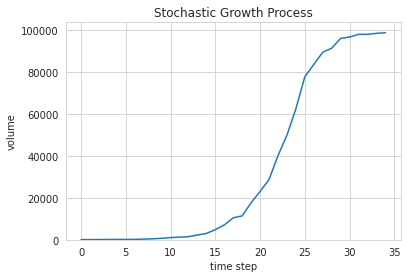

In [2]:
eta = .33
tampw = 100000 

length = range(36)
v = np.zeros(length[-1])
v[0] = 100
for i in length[1:-1]:
    v[i] = v[i-1]*(1+2*eta*np.random.rand()*(1-v[i-1]/tampw))

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)


[Text(0.5, 0, 'time step'),
 Text(0, 0.5, 'volume'),
 Text(0.5, 1.0, 'Stochastic Growth Process'),
 (0.0, 94078.39756392648)]

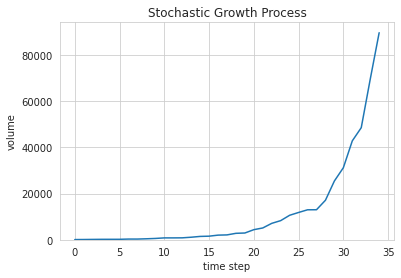

In [3]:
eta = .33
tampw = 100000 

length = range(36)
v = np.zeros(length[-1])
v[0] = 100
for i in length[1:-1]:
    v[i] = v[i-1] *(1+1.5*eta*np.random.rand())

fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(v,label='growth rate')
ax.set(xlabel='time step', ylabel='volume',
       title='Stochastic Growth Process',ylim = 0)

### Product Cost
We create a random process to represent the growth of the cost of production, due to inflation, etc over time.

[Text(0.5, 0, 'time step'),
 Text(0, 0.5, 'cost'),
 Text(0.5, 1.0, 'Product Cost Stochastic Process'),
 (0.0, 0.3349434150126892)]

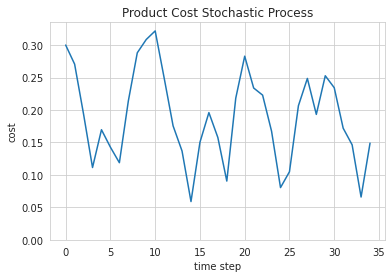

In [4]:
alpha = .5
beta = .2
length = range(36)
p = np.zeros(length[-1])
p[0] = .3
for i in length[1:-1]:
    p[i] = alpha * p[i-1]+beta*np.random.rand() - .01
    
fig, ax = plt.subplots(nrows=1, ncols=1 )
ax.plot(p,label='cost')
ax.set(xlabel='time step', ylabel='cost',
       title='Product Cost Stochastic Process',ylim = 0)



<AxesSubplot:title={'center':'Product Cost Stochastic Process'}>

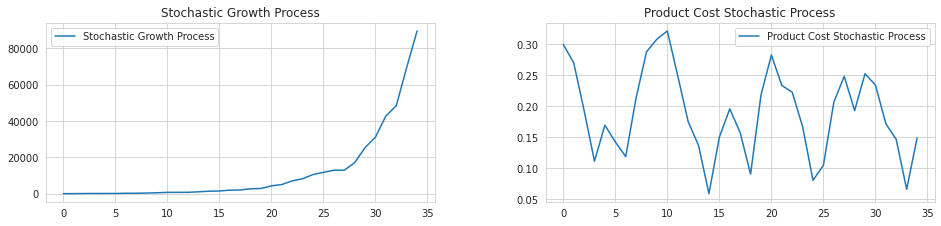

In [5]:
plot = pd.DataFrame({'Stochastic Growth Process':v,'Product Cost Stochastic Process':p})

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5),sharey=False)
fig.tight_layout(pad=8)

plot.plot(y='Stochastic Growth Process',title='Stochastic Growth Process',logy=False,ax=axes[0],grid=True)
plot.plot(y='Product Cost Stochastic Process',title='Product Cost Stochastic Process',logy=False,ax=axes[1],grid=True)


## Run cadCAD simulation

In [6]:
# Experiments
from model import run
from model.parts.utils import *
pd.options.display.float_format = '{:.2f}'.format


df = run.run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 36, 8, 100, 8)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (36, 8, 100, 8)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 6.45s


In [7]:
df.head()

,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,simulation,subset,run,substep,timestep
0,100.00,0.30,0.00,0.00,100.00,0.00,0.00,0.00,0,0,1,0,0
1,144.58,0.20,0.00,0.00,5100.00,0.00,1000.00,0.00,0,0,1,1,1
2,144.58,0.20,144.58,144.58,5100.00,0.00,1000.00,0.00,0,0,1,2,1
3,144.58,0.20,144.58,144.58,5100.00,0.00,1000.00,0.00,0,0,1,3,1
4,144.58,0.20,144.58,-4955.42,5100.00,0.00,1000.00,0.00,0,0,1,4,1


In [8]:
df.tail()

,tx_volume,product_cost,revenue,fiat_reserve,overhead_cost,seed_money,R&D,COGS,simulation,subset,run,substep,timestep
18095,99566.26,0.13,99168.59,1220178.90,15100.00,200000.00,3000.00,21606.58,0,0,100,1,36
18096,99566.26,0.13,99566.26,1319745.16,15100.00,200000.00,3000.00,21606.58,0,0,100,2,36
18097,99566.26,0.13,99566.26,1319745.16,15100.00,200000.00,3000.00,21606.58,0,0,100,3,36
18098,99566.26,0.13,99566.26,1304645.16,15100.00,200000.00,3000.00,21606.58,0,0,100,4,36
18099,99566.26,0.13,99566.26,1304645.16,15100.00,200000.00,3000.00,13209.78,0,0,100,5,36


In [9]:
mean_df,median_df,std_df,min_df = aggregate_runs(df,'timestep')

We examine the Fiat Reserve in more depth and fit a line a to the plot to show the trajectory. As we can see from the plot below, the fiat reserve is increasing throughout the time period studied. 

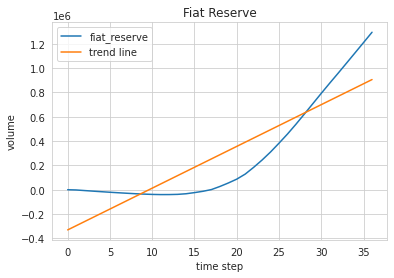

In [10]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['fiat_reserve'])),mean_df['fiat_reserve'],1,full=True)
plt.plot(mean_df['fiat_reserve'],label='fiat_reserve')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['fiat_reserve']))],label='trend line')
plt.title('Fiat Reserve')
plt.xlabel('time step')
plt.ylabel('volume')
plt.legend()

We also examine the transaction volume, and as it is an exogenous (external to the system) process, it follows the same s-shaped curve we built as an individual component above. 

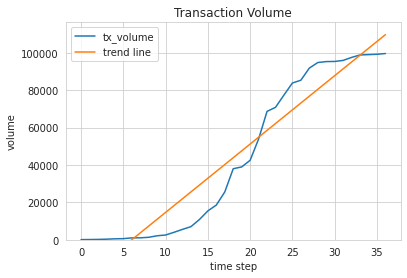

In [11]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['tx_volume'])),mean_df['tx_volume'],1,full=True)
plt.plot(mean_df['tx_volume'],label='tx_volume')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['tx_volume']))],label='trend line')
plt.title('Transaction Volume')
plt.xlabel('time step')
plt.ylabel('volume')
plt.ylim(0)
plt.legend()

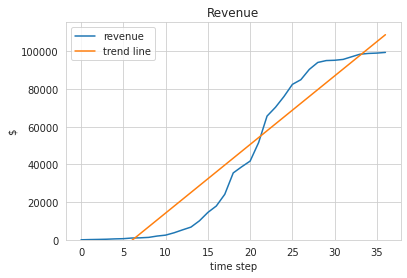

In [12]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['revenue'])),mean_df['revenue'],1,full=True)
plt.plot(mean_df['revenue'],label='revenue')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['revenue']))],label='trend line')
plt.title('Revenue')
plt.xlabel('time step')
plt.ylabel('$')
plt.ylim(0)
plt.legend()

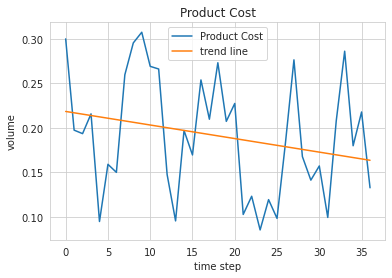

In [13]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(mean_df['product_cost'])),mean_df['product_cost'],1,full=True)
plt.plot(mean_df['product_cost'],label='Product Cost')
plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(mean_df['product_cost']))],label='trend line')
plt.title('Product Cost')
plt.xlabel('time step')
plt.ylabel('volume')
plt.legend()

We plotted the results of the simulation below in figure. We can see that the Fiat Reserve initially decreased into negative territory while the company was getting started (we are assuming the model starts at day one of the company, or new business venture). Initially the company receives an injection of capital through VC seed money, although this trails off over time as the company matures. The overhead costs steadily increase through the simulation, however the product cost varies significantly, but is on downward sloping trend and the company becomes more efficient. We see that revenue starts off at 0 and takes a while to ramp up (as would be expected for a start-up, hence the initial cash flow problem). And finally, we examine the transaction volume, and as it is an exogenous (external to the system) process, it follows the same s-shaped curve we built as an individual component above. 

In [14]:
# Calculate the metrics
mean_df['RevenueQuarterlyPercentageChange']= mean_df['revenue'].pct_change(periods=3)
mean_df['GrossMargin'] = df['revenue'] - df['COGS']
mean_df['EBITDA'] = df['revenue'] - df['COGS'] - df['overhead_cost'] - df['R&D']

<AxesSubplot:title={'center':'EBITDA per month'}, xlabel='timestep'>

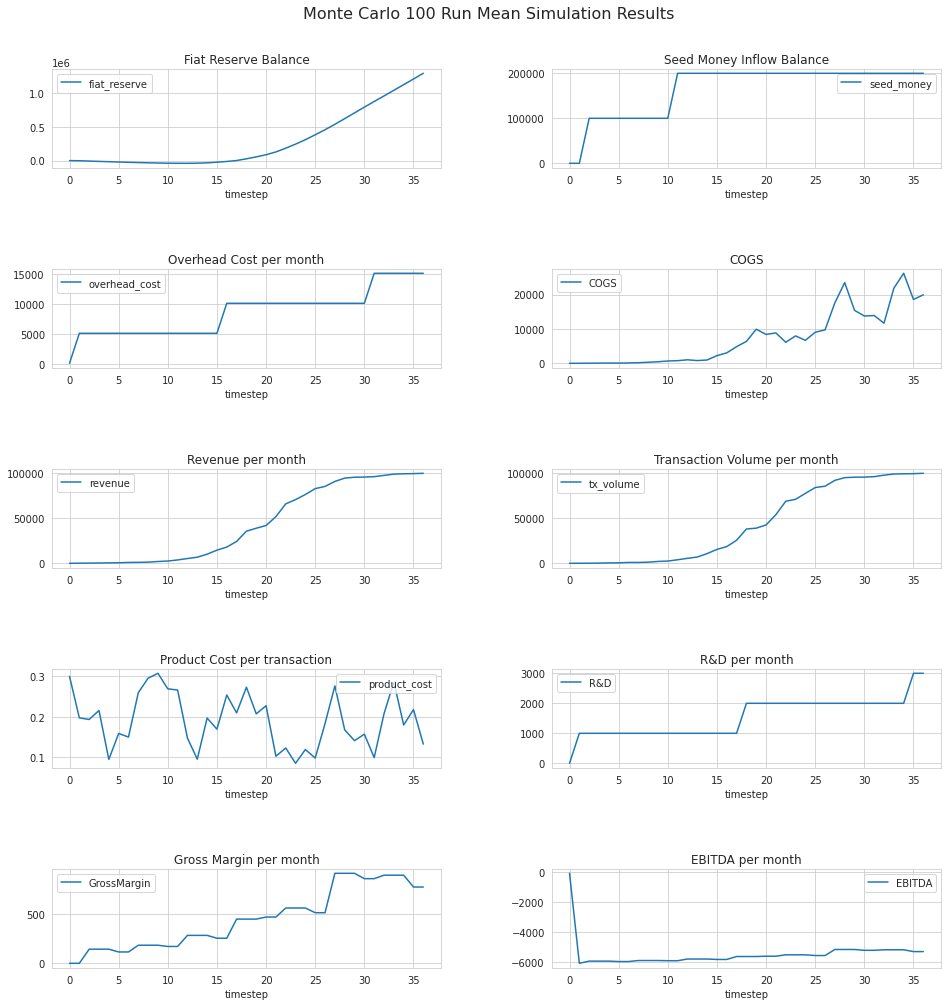

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(15, 15),sharey=False)
fig.tight_layout(pad=8)

fig.suptitle("Monte Carlo 100 Run Mean Simulation Results", fontsize=16)

mean_df.plot(x = 'timestep',y='fiat_reserve',title='Fiat Reserve Balance',logy=False,ax=axes[0,0],grid=True)
mean_df.plot(x = 'timestep',y='seed_money',title='Seed Money Inflow Balance',logy=False,ax=axes[0,1],grid=True)
mean_df.plot(x = 'timestep',y='overhead_cost',title='Overhead Cost per month',logy=False,ax=axes[1,0],grid=True)
mean_df.plot(x = 'timestep',y='COGS',title='COGS',logy=False,ax=axes[1,1],grid=True)
mean_df.plot(x = 'timestep',y='revenue',title='Revenue per month',logy=False,ax=axes[2,0],grid=True)
mean_df.plot(x = 'timestep',y='tx_volume',title='Transaction Volume per month',logy=False,ax=axes[2,1],grid=True)
mean_df.plot(x = 'timestep',y='product_cost',title='Product Cost per transaction',logy=False,ax=axes[3,0],grid=True)
mean_df.plot(x = 'timestep',y='R&D',title='R&D per month',logy=False,ax=axes[3,1],grid=True)
mean_df.plot(x = 'timestep',y='GrossMargin',title='Gross Margin per month',logy=False,ax=axes[4,0],grid=True)
mean_df.plot(x = 'timestep',y='EBITDA',title='EBITDA per month',logy=False,ax=axes[4,1],grid=True)

## Conclusion

We have walked through a basic dynamical system ecosystem model taking in some external variables and seeing how the system responds to these signals and evolves. We observe that the policy and pricing incentives built into the model represent a successful business model. Now, this is an extremely simplistic model and lacks more rigorous assumptions and testing, but provides an excellent starting point for showing how we model dynamic complex systems. Significantly what makes our modeling approach so powerful, is we can A/B Test, or in other words, try slightly different policies and see how the system interacts and how the outputs we are concerned about respond. It is a very effective mechanism for making business decisions. Our methodologies along with the cadCAD tool allow us to represent a company’s current business model along with the desired future state and help the company make informed, rigorously tested decisions on how to get you from point a to point b.